In [25]:
import nltk
from nltk.corpus import brown
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import ngrams
from nltk.tokenize import RegexpTokenizer
from nltk.util import pad_sequence

import pandas as pd

import itertools
from itertools import chain
import matplotlib.pyplot as plt
import random
%matplotlib inline


In [26]:
nltk.download('brown')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package brown to
[nltk_data]     /Users/jitender.singh/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jitender.singh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jitender.singh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
"""
Read corpus file, and create sentences using sent_tokenize
"""
with open('corpus.txt', 'r', encoding='utf-8') as fh:
    sentences = [sent_tokenize(x) for x in fh.readlines()]

df = pd.DataFrame(sentences)
df.columns = ['sentences']
df

,sentences
0,CHAPTER I.
1,Down the Rabbit-Hole Alice was beginning to ge...
2,There was nothing so _very_ remarkable in that...
3,Oh dear!
4,I shall be late!” (when she thought it over af...
...,...
968,"But her sister sat still just as she left her,..."
969,The long grass rustled at her feet as the Whit...
970,"So she sat on, with closed eyes, and half beli..."
971,"Lastly, she pictured to herself how this same ..."


In [28]:
"""
Lower case
"""
df['sentences_filtered'] = df['sentences'].str.lower()
df

,sentences,sentences_filtered
0,CHAPTER I.,chapter i.
1,Down the Rabbit-Hole Alice was beginning to ge...,down the rabbit-hole alice was beginning to ge...
2,There was nothing so _very_ remarkable in that...,there was nothing so _very_ remarkable in that...
3,Oh dear!,oh dear!
4,I shall be late!” (when she thought it over af...,i shall be late!” (when she thought it over af...
...,...,...
968,"But her sister sat still just as she left her,...","but her sister sat still just as she left her,..."
969,The long grass rustled at her feet as the Whit...,the long grass rustled at her feet as the whit...
970,"So she sat on, with closed eyes, and half beli...","so she sat on, with closed eyes, and half beli..."
971,"Lastly, she pictured to herself how this same ...","lastly, she pictured to herself how this same ..."


In [29]:
"""
Remove punctuations
"""
tokenizer = RegexpTokenizer(r'\w+')
df['sentences_filtered'] = df.apply(lambda df : tokenizer.tokenize(df['sentences_filtered']), axis=1)
df

,sentences,sentences_filtered
0,CHAPTER I.,"[chapter, i]"
1,Down the Rabbit-Hole Alice was beginning to ge...,"[down, the, rabbit, hole, alice, was, beginnin..."
2,There was nothing so _very_ remarkable in that...,"[there, was, nothing, so, _very_, remarkable, ..."
3,Oh dear!,"[oh, dear]"
4,I shall be late!” (when she thought it over af...,"[i, shall, be, late, when, she, thought, it, o..."
...,...,...
968,"But her sister sat still just as she left her,...","[but, her, sister, sat, still, just, as, she, ..."
969,The long grass rustled at her feet as the Whit...,"[the, long, grass, rustled, at, her, feet, as,..."
970,"So she sat on, with closed eyes, and half beli...","[so, she, sat, on, with, closed, eyes, and, ha..."
971,"Lastly, she pictured to herself how this same ...","[lastly, she, pictured, to, herself, how, this..."


In [30]:
"""
list stop words
"""
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
"""
remove stop words
"""
df['sentences_with_stopwords'] = df['sentences_filtered']
df['sentences_filtered'] = df['sentences_filtered'].apply(lambda x: [item for item in x if item not in stop_words])
df

,sentences,sentences_filtered,sentences_with_stopwords
0,CHAPTER I.,[chapter],"[chapter, i]"
1,Down the Rabbit-Hole Alice was beginning to ge...,"[rabbit, hole, alice, beginning, get, tired, s...","[down, the, rabbit, hole, alice, was, beginnin..."
2,There was nothing so _very_ remarkable in that...,"[nothing, _very_, remarkable, alice, think, _v...","[there, was, nothing, so, _very_, remarkable, ..."
3,Oh dear!,"[oh, dear]","[oh, dear]"
4,I shall be late!” (when she thought it over af...,"[shall, late, thought, afterwards, occurred, o...","[i, shall, be, late, when, she, thought, it, o..."
...,...,...,...
968,"But her sister sat still just as she left her,...","[sister, sat, still, left, leaning, head, hand...","[but, her, sister, sat, still, just, as, she, ..."
969,The long grass rustled at her feet as the Whit...,"[long, grass, rustled, feet, white, rabbit, hu...","[the, long, grass, rustled, at, her, feet, as,..."
970,"So she sat on, with closed eyes, and half beli...","[sat, closed, eyes, half, believed, wonderland...","[so, she, sat, on, with, closed, eyes, and, ha..."
971,"Lastly, she pictured to herself how this same ...","[lastly, pictured, little, sister, would, time...","[lastly, she, pictured, to, herself, how, this..."


In [32]:
"""
pad sentences for bigrams, trigrams, fourgrams
"""
df['sentences_pad_bi'] = df['sentences_filtered'].apply(lambda item: list(pad_sequence(item, n=2, pad_left=True, left_pad_symbol="<s>", pad_right=True, right_pad_symbol="</s>")))
df['sentences_pad_tri'] = df['sentences_filtered'].apply(lambda item: list(pad_sequence(item, n=3, pad_left=True, left_pad_symbol="<s>", pad_right=True, right_pad_symbol="</s>")))
df['sentences_pad_four'] = df['sentences_filtered'].apply(lambda item: list(pad_sequence(item, n=4, pad_left=True, left_pad_symbol="<s>", pad_right=True, right_pad_symbol="</s>")))

df[['sentences_pad_bi', 'sentences_pad_tri', 'sentences_pad_four']]

,sentences_pad_bi,sentences_pad_tri,sentences_pad_four
0,"[<s>, chapter, </s>]","[<s>, <s>, chapter, </s>, </s>]","[<s>, <s>, <s>, chapter, </s>, </s>, </s>]"
1,"[<s>, rabbit, hole, alice, beginning, get, tir...","[<s>, <s>, rabbit, hole, alice, beginning, get...","[<s>, <s>, <s>, rabbit, hole, alice, beginning..."
2,"[<s>, nothing, _very_, remarkable, alice, thin...","[<s>, <s>, nothing, _very_, remarkable, alice,...","[<s>, <s>, <s>, nothing, _very_, remarkable, a..."
3,"[<s>, oh, dear, </s>]","[<s>, <s>, oh, dear, </s>, </s>]","[<s>, <s>, <s>, oh, dear, </s>, </s>, </s>]"
4,"[<s>, shall, late, thought, afterwards, occurr...","[<s>, <s>, shall, late, thought, afterwards, o...","[<s>, <s>, <s>, shall, late, thought, afterwar..."
...,...,...,...
968,"[<s>, sister, sat, still, left, leaning, head,...","[<s>, <s>, sister, sat, still, left, leaning, ...","[<s>, <s>, <s>, sister, sat, still, left, lean..."
969,"[<s>, long, grass, rustled, feet, white, rabbi...","[<s>, <s>, long, grass, rustled, feet, white, ...","[<s>, <s>, <s>, long, grass, rustled, feet, wh..."
970,"[<s>, sat, closed, eyes, half, believed, wonde...","[<s>, <s>, sat, closed, eyes, half, believed, ...","[<s>, <s>, <s>, sat, closed, eyes, half, belie..."
971,"[<s>, lastly, pictured, little, sister, would,...","[<s>, <s>, lastly, pictured, little, sister, w...","[<s>, <s>, <s>, lastly, pictured, little, sist..."


In [33]:
"""
repeating the same for sentences with stopwords
"""
df['sentences_pad_bi_sw'] = df['sentences_with_stopwords'].apply(lambda item: list(pad_sequence(item, n=2, pad_left=True, left_pad_symbol="<s>", pad_right=True, right_pad_symbol="</s>")))
df['sentences_pad_tri_sw'] = df['sentences_with_stopwords'].apply(lambda item: list(pad_sequence(item, n=3, pad_left=True, left_pad_symbol="<s>", pad_right=True, right_pad_symbol="</s>")))
df['sentences_pad_four_sw'] = df['sentences_with_stopwords'].apply(lambda item: list(pad_sequence(item, n=4, pad_left=True, left_pad_symbol="<s>", pad_right=True, right_pad_symbol="</s>")))

df[['sentences_pad_bi_sw', 'sentences_pad_tri_sw', 'sentences_pad_four_sw']]

,sentences_pad_bi_sw,sentences_pad_tri_sw,sentences_pad_four_sw
0,"[<s>, chapter, i, </s>]","[<s>, <s>, chapter, i, </s>, </s>]","[<s>, <s>, <s>, chapter, i, </s>, </s>, </s>]"
1,"[<s>, down, the, rabbit, hole, alice, was, beg...","[<s>, <s>, down, the, rabbit, hole, alice, was...","[<s>, <s>, <s>, down, the, rabbit, hole, alice..."
2,"[<s>, there, was, nothing, so, _very_, remarka...","[<s>, <s>, there, was, nothing, so, _very_, re...","[<s>, <s>, <s>, there, was, nothing, so, _very..."
3,"[<s>, oh, dear, </s>]","[<s>, <s>, oh, dear, </s>, </s>]","[<s>, <s>, <s>, oh, dear, </s>, </s>, </s>]"
4,"[<s>, i, shall, be, late, when, she, thought, ...","[<s>, <s>, i, shall, be, late, when, she, thou...","[<s>, <s>, <s>, i, shall, be, late, when, she,..."
...,...,...,...
968,"[<s>, but, her, sister, sat, still, just, as, ...","[<s>, <s>, but, her, sister, sat, still, just,...","[<s>, <s>, <s>, but, her, sister, sat, still, ..."
969,"[<s>, the, long, grass, rustled, at, her, feet...","[<s>, <s>, the, long, grass, rustled, at, her,...","[<s>, <s>, <s>, the, long, grass, rustled, at,..."
970,"[<s>, so, she, sat, on, with, closed, eyes, an...","[<s>, <s>, so, she, sat, on, with, closed, eye...","[<s>, <s>, <s>, so, she, sat, on, with, closed..."
971,"[<s>, lastly, she, pictured, to, herself, how,...","[<s>, <s>, lastly, she, pictured, to, herself,...","[<s>, <s>, <s>, lastly, she, pictured, to, her..."


In [34]:
"""
Create n-grams, 
also keeping their df[''] object to easily create countmaps..
"""

df['unigrams'] = df['sentences_filtered'].apply(lambda item: list(nltk.ngrams(item, 1)))
unigrams = list(itertools.chain.from_iterable(df['unigrams']))

df['bigrams'] = df['sentences_pad_bi'].apply(lambda item: list(nltk.ngrams(item, 2)))
bigrams = list(itertools.chain.from_iterable(df['bigrams']))

df['trigrams'] = df['sentences_pad_tri'].apply(lambda item: list(nltk.ngrams(item, 3)))
trigrams = list(itertools.chain.from_iterable(df['trigrams']))

df['fourgrams'] = df['sentences_pad_four'].apply(lambda item: list(nltk.ngrams(item, 4)))
fourgrams = list(itertools.chain.from_iterable(df['fourgrams']))

df[['unigrams', 'bigrams', 'trigrams', 'fourgrams']]

,unigrams,bigrams,trigrams,fourgrams
0,"[(chapter,)]","[(<s>, chapter), (chapter, </s>)]","[(<s>, <s>, chapter), (<s>, chapter, </s>), (c...","[(<s>, <s>, <s>, chapter), (<s>, <s>, chapter,..."
1,"[(rabbit,), (hole,), (alice,), (beginning,), (...","[(<s>, rabbit), (rabbit, hole), (hole, alice),...","[(<s>, <s>, rabbit), (<s>, rabbit, hole), (rab...","[(<s>, <s>, <s>, rabbit), (<s>, <s>, rabbit, h..."
2,"[(nothing,), (_very_,), (remarkable,), (alice,...","[(<s>, nothing), (nothing, _very_), (_very_, r...","[(<s>, <s>, nothing), (<s>, nothing, _very_), ...","[(<s>, <s>, <s>, nothing), (<s>, <s>, nothing,..."
3,"[(oh,), (dear,)]","[(<s>, oh), (oh, dear), (dear, </s>)]","[(<s>, <s>, oh), (<s>, oh, dear), (oh, dear, <...","[(<s>, <s>, <s>, oh), (<s>, <s>, oh, dear), (<..."
4,"[(shall,), (late,), (thought,), (afterwards,),...","[(<s>, shall), (shall, late), (late, thought),...","[(<s>, <s>, shall), (<s>, shall, late), (shall...","[(<s>, <s>, <s>, shall), (<s>, <s>, shall, lat..."
...,...,...,...,...
968,"[(sister,), (sat,), (still,), (left,), (leanin...","[(<s>, sister), (sister, sat), (sat, still), (...","[(<s>, <s>, sister), (<s>, sister, sat), (sist...","[(<s>, <s>, <s>, sister), (<s>, <s>, sister, s..."
969,"[(long,), (grass,), (rustled,), (feet,), (whit...","[(<s>, long), (long, grass), (grass, rustled),...","[(<s>, <s>, long), (<s>, long, grass), (long, ...","[(<s>, <s>, <s>, long), (<s>, <s>, long, grass..."
970,"[(sat,), (closed,), (eyes,), (half,), (believe...","[(<s>, sat), (sat, closed), (closed, eyes), (e...","[(<s>, <s>, sat), (<s>, sat, closed), (sat, cl...","[(<s>, <s>, <s>, sat), (<s>, <s>, sat, closed)..."
971,"[(lastly,), (pictured,), (little,), (sister,),...","[(<s>, lastly), (lastly, pictured), (pictured,...","[(<s>, <s>, lastly), (<s>, lastly, pictured), ...","[(<s>, <s>, <s>, lastly), (<s>, <s>, lastly, p..."


In [35]:
"""
Create n-grams for sentences with stopwords 
also keeping their df[''] object to easily create countmaps..
"""

df['unigrams_sw'] = df['sentences_with_stopwords'].apply(lambda item: list(nltk.ngrams(item, 1)))
unigrams_sw = list(itertools.chain.from_iterable(df['unigrams_sw']))

df['bigrams_sw'] = df['sentences_pad_bi_sw'].apply(lambda item: list(nltk.ngrams(item, 2)))
bigrams_sw = list(itertools.chain.from_iterable(df['bigrams_sw']))

df['trigrams_sw'] = df['sentences_pad_tri_sw'].apply(lambda item: list(nltk.ngrams(item, 3)))
trigrams_sw = list(itertools.chain.from_iterable(df['trigrams_sw']))

df['fourgrams_sw'] = df['sentences_pad_four_sw'].apply(lambda item: list(nltk.ngrams(item, 4)))
fourgrams_sw = list(itertools.chain.from_iterable(df['fourgrams_sw']))

df[['unigrams_sw', 'bigrams_sw', 'trigrams_sw', 'fourgrams_sw']]

,unigrams_sw,bigrams_sw,trigrams_sw,fourgrams_sw
0,"[(chapter,), (i,)]","[(<s>, chapter), (chapter, i), (i, </s>)]","[(<s>, <s>, chapter), (<s>, chapter, i), (chap...","[(<s>, <s>, <s>, chapter), (<s>, <s>, chapter,..."
1,"[(down,), (the,), (rabbit,), (hole,), (alice,)...","[(<s>, down), (down, the), (the, rabbit), (rab...","[(<s>, <s>, down), (<s>, down, the), (down, th...","[(<s>, <s>, <s>, down), (<s>, <s>, down, the),..."
2,"[(there,), (was,), (nothing,), (so,), (_very_,...","[(<s>, there), (there, was), (was, nothing), (...","[(<s>, <s>, there), (<s>, there, was), (there,...","[(<s>, <s>, <s>, there), (<s>, <s>, there, was..."
3,"[(oh,), (dear,)]","[(<s>, oh), (oh, dear), (dear, </s>)]","[(<s>, <s>, oh), (<s>, oh, dear), (oh, dear, <...","[(<s>, <s>, <s>, oh), (<s>, <s>, oh, dear), (<..."
4,"[(i,), (shall,), (be,), (late,), (when,), (she...","[(<s>, i), (i, shall), (shall, be), (be, late)...","[(<s>, <s>, i), (<s>, i, shall), (i, shall, be...","[(<s>, <s>, <s>, i), (<s>, <s>, i, shall), (<s..."
...,...,...,...,...
968,"[(but,), (her,), (sister,), (sat,), (still,), ...","[(<s>, but), (but, her), (her, sister), (siste...","[(<s>, <s>, but), (<s>, but, her), (but, her, ...","[(<s>, <s>, <s>, but), (<s>, <s>, but, her), (..."
969,"[(the,), (long,), (grass,), (rustled,), (at,),...","[(<s>, the), (the, long), (long, grass), (gras...","[(<s>, <s>, the), (<s>, the, long), (the, long...","[(<s>, <s>, <s>, the), (<s>, <s>, the, long), ..."
970,"[(so,), (she,), (sat,), (on,), (with,), (close...","[(<s>, so), (so, she), (she, sat), (sat, on), ...","[(<s>, <s>, so), (<s>, so, she), (so, she, sat...","[(<s>, <s>, <s>, so), (<s>, <s>, so, she), (<s..."
971,"[(lastly,), (she,), (pictured,), (to,), (herse...","[(<s>, lastly), (lastly, she), (she, pictured)...","[(<s>, <s>, lastly), (<s>, lastly, she), (last...","[(<s>, <s>, <s>, lastly), (<s>, <s>, lastly, s..."


In [36]:
print('without stopwords, len of - unigrams: {}, bigrams: {}, trigrams: {}, fourgrams: {}'.format(
    len(unigrams), len(bigrams), len(trigrams), len(fourgrams))
)
print('with stopwords,    len of - unigrams: {}, bigrams: {}, trigrams: {}, fourgrams: {}'.format(
    len(unigrams_sw), len(bigrams_sw), len(trigrams_sw), len(fourgrams_sw))
)

without stopwords, len of - unigrams: 12424, bigrams: 13397, trigrams: 14370, fourgrams: 15343
with stopwords,    len of - unigrams: 27347, bigrams: 28320, trigrams: 29293, fourgrams: 30266


<AxesSubplot:>

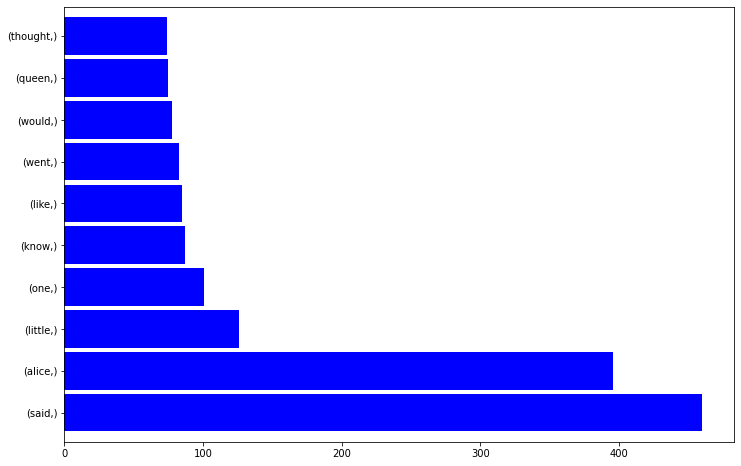

In [37]:
"""
plot top 10
"""
unigrams_counts = df['unigrams'].apply(lambda x: pd.Series(x, dtype='object').value_counts()).sum().sort_values(ascending=False)
unigrams_counts_sw = df['unigrams_sw'].apply(lambda x: pd.Series(x, dtype='object').value_counts()).sum().sort_values(ascending=False)
unigrams_counts[:10].plot.barh(color='blue', width=.9, figsize=(12, 8))

<AxesSubplot:>

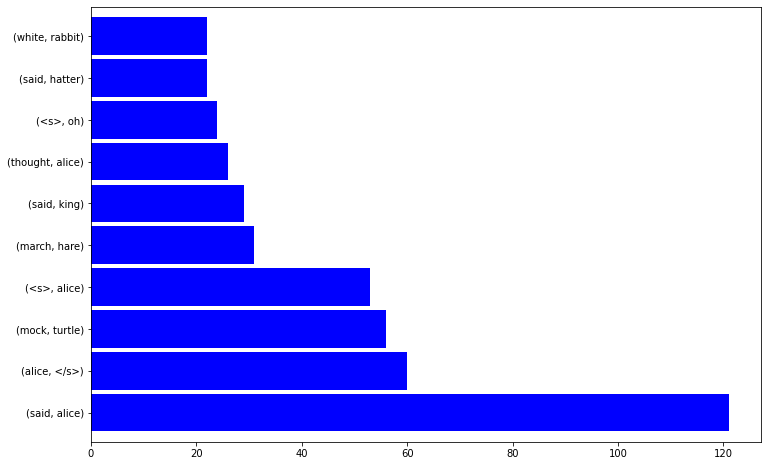

In [38]:
"""
bigram value counts
"""

bigrams_counts = df['bigrams'].apply(lambda x: pd.Series(x, dtype='object').value_counts()).sum().sort_values(ascending=False)
bigrams_counts_sw = df['bigrams_sw'].apply(lambda x: pd.Series(x, dtype='object').value_counts()).sum().sort_values(ascending=False)
bigrams_counts[:10].plot.barh(color='blue', width=.9, figsize=(12, 8))

<AxesSubplot:>

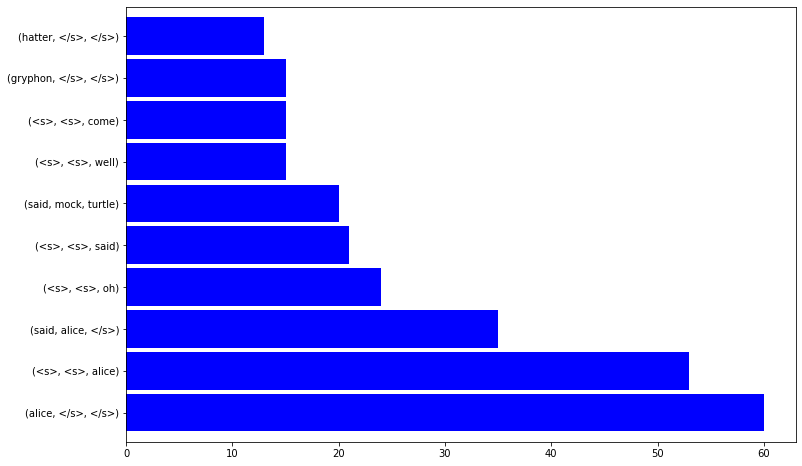

In [39]:
"""
trigram value counts
"""
trigrams_counts = df['trigrams'].apply(lambda x: pd.Series(x, dtype='object').value_counts()).sum().sort_values(ascending=False)
trigrams_counts_sw = df['trigrams_sw'].apply(lambda x: pd.Series(x, dtype='object').value_counts()).sum().sort_values(ascending=False)
trigrams_counts[:10].plot.barh(color='blue', width=.9, figsize=(12, 8))

<AxesSubplot:>

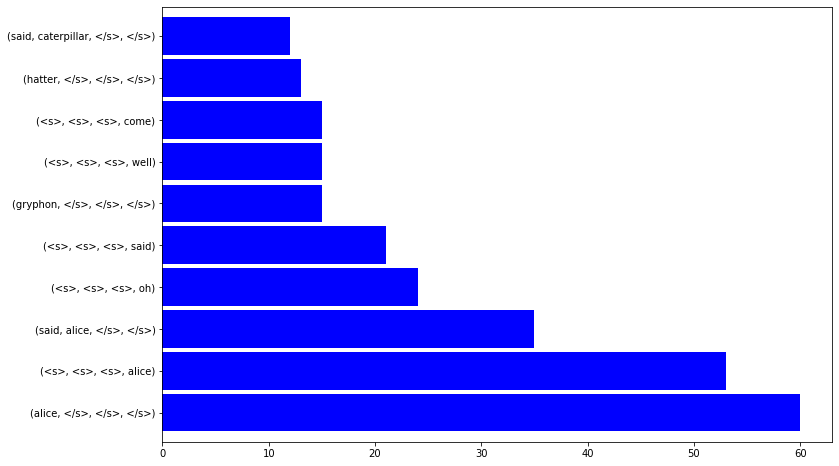

In [40]:
"""
fourgram value counts
"""
fourgrams_counts = df['fourgrams'].apply(lambda x: pd.Series(x, dtype='object').value_counts()).sum().sort_values(ascending=False)
fourgrams_counts_sw = df['fourgrams_sw'].apply(lambda x: pd.Series(x, dtype='object').value_counts()).sum().sort_values(ascending=False)
fourgrams_counts[:10].plot.barh(color='blue', width=.9, figsize=(12, 8))

In [41]:
"""
For the remaining part we can just make use of unigrams, bigrams lists, and drop the dataframe as it is not needed.
"""
df.drop(df.index, inplace=True)

In [43]:
uni_prob = {}
def unigram_probability(wordlist, k=1):
    wordlist_str = ':'.join(wordlist)
    wordlist_str = ':'.join([wordlist_str, str(k)])
    if uni_prob.get(wordlist_str):
        return uni_prob[wordlist_str]
    
    uni_prob[wordlist_str] = unigrams_counts.get(wordlist, default=k) / (len(unigrams) + k*len(unigrams_counts))
    return uni_prob[wordlist_str]

"""
Word probabilities - unigram.
"""
index = random.randint(0, len(unigrams) - 1)

random_word = unigrams[index]
unknown_word = ('Unigram',)


for k in [0, 1, 0.5]:
    print('with smoothing k = {}'.format(k))
    print('Index: {}, word:{}, probability: {}'.format(index, random_word, unigram_probability(random_word, k)))

    print('Index: OOV, word:{}, probability: {}'.format(unknown_word, unigram_probability(unknown_word, k)))
    print("---\n\n")




with smoothing k = 0
Index: 5567, word:('song',), probability: 0.0005634256278171281
Index: OOV, word:('Unigram',), probability: 0.0
---


with smoothing k = 1
Index: 5567, word:('song',), probability: 0.0004679144385026738
Index: OOV, word:('Unigram',), probability: 6.684491978609626e-05
---


with smoothing k = 0.5
Index: 5567, word:('song',), probability: 0.0005112474437627812
Index: OOV, word:('Unigram',), probability: 3.651767455448437e-05
---




In [44]:
"""
Word probabilities - bigram.
"""
bi_prob = {}
def bigram_probability(wordlist, k=1):
    wordlist_str = ':'.join(wordlist)
    wordlist_str = ':'.join([wordlist_str, str(k)])
    # avoid divide by zero condition.
    if k == 0 and wordlist[-1] not in unigrams_counts.keys():
        return 0

    if bi_prob.get(wordlist_str):
        return bi_prob[wordlist_str]
    
    bi_prob[wordlist_str] = bigrams_counts.get(wordlist, default=k) / (unigrams_counts.get(wordlist[-1], default=0) + k * len(bigrams_counts))
    return bi_prob[wordlist_str]


index = random.randint(0, len(bigrams) - 1)

random_word = bigrams[index]
unknown_word = ('Unigram', 'Bigram', )


for k in [0, 1, 0.5]:
    print('with smoothing k = {}'.format(k))
    print('Index: {}, word:{}, probability: {}'.format(index, random_word, bigram_probability(random_word, k)))

    print('Index: OOV, word:{}, probability: {}'.format(unknown_word, bigram_probability(unknown_word, k)))
    print("---\n\n")



with smoothing k = 0
Index: 9523, word:('stamping', 'ground'), probability: 0.125
Index: OOV, word:('Unigram', 'Bigram'), probability: 0
---


with smoothing k = 1
Index: 9523, word:('stamping', 'ground'), probability: 9.467007478935909e-05
Index: OOV, word:('Unigram', 'Bigram'), probability: 9.474182851729038e-05
---


with smoothing k = 0.5
Index: 9523, word:('stamping', 'ground'), probability: 0.00018919685933213508
Index: OOV, word:('Unigram', 'Bigram'), probability: 9.474182851729038e-05
---




In [45]:
"""
Word probabilities - trigram.
"""
tri_prob = {}
def trigram_probability(wordlist, k=1):
    wordlist_str = ':'.join(wordlist)
    wordlist_str = ':'.join([wordlist_str, str(k)])

    # avoid divide by zero condition.
    if k == 0  and wordlist[0:2] not in bigrams_counts.keys():
        return 0

    if tri_prob.get(wordlist_str):
        return tri_prob[wordlist_str]
    
    tri_prob[wordlist_str] = trigrams_counts.get(wordlist, default=k) / (bigrams_counts.get(wordlist[0:2], default=0) + k * len(trigrams_counts))
    return tri_prob[wordlist_str]
    

index = random.randint(0, len(trigrams) - 1)

random_word = trigrams[index]
unknown_word = ('Unigram', 'Bigram', 'Trigram')


for k in [0, 1, 0.5]:
    print('with smoothing k = {}'.format(k))
    print('Index: {}, word:{}, probability: {}'.format(index, random_word, trigram_probability(random_word, k)))

    print('Index: OOV, word:{}, probability: {}'.format(unknown_word, trigram_probability(unknown_word, k)))
    print("---\n\n")



with smoothing k = 0
Index: 10499, word:('gryphon', 'answered', 'nearly'), probability: 0.5
Index: OOV, word:('Unigram', 'Bigram', 'Trigram'), probability: 0
---


with smoothing k = 1
Index: 10499, word:('gryphon', 'answered', 'nearly'), probability: 7.782706825433887e-05
Index: OOV, word:('Unigram', 'Bigram', 'Trigram'), probability: 7.78391842453491e-05
---


with smoothing k = 0.5
Index: 10499, word:('gryphon', 'answered', 'nearly'), probability: 0.00015562991206909967
Index: OOV, word:('Unigram', 'Bigram', 'Trigram'), probability: 7.78391842453491e-05
---




In [46]:
"""
Word probabilities - fourgram.
"""

four_prob = {}
def fourgram_probability(wordlist, k=1):
    wordlist_str = ':'.join(wordlist)
    wordlist_str = ':'.join([wordlist_str, str(k)])
    
    # avoid divide by zero condition.
    if k == 0  and wordlist[0:3] not in trigrams_counts.keys():
        return 0

    if four_prob.get(wordlist_str):
        return four_prob[wordlist_str]
    
    four_prob[wordlist_str] = fourgrams_counts.get(wordlist, default=k) / (trigrams_counts.get(wordlist[0:3], default=0) + k * len(fourgrams_counts))
    return four_prob[wordlist_str]

index = random.randint(0, len(fourgrams) - 1)

random_word = fourgrams[index]
unknown_word = ('Unigram', 'Bigram', 'Trigram', 'Fourgram')


for k in [0, 1, 0.5]:
    print('with smoothing k = {}'.format(k))
    print('Index: {}, word:{}, probability: {}'.format(index, random_word, fourgram_probability(random_word, k)))

    print('Index: OOV, word:{}, probability: {}'.format(unknown_word, fourgram_probability(unknown_word, k)))
    print("---\n\n")



with smoothing k = 0
Index: 12987, word:('taking', 'alice', 'hand', 'hurried'), probability: 1.0
Index: OOV, word:('Unigram', 'Bigram', 'Trigram', 'Fourgram'), probability: 0
---


with smoothing k = 1
Index: 12987, word:('taking', 'alice', 'hand', 'hurried'), probability: 7.15000715000715e-05
Index: OOV, word:('Unigram', 'Bigram', 'Trigram', 'Fourgram'), probability: 7.150518412584913e-05
---


with smoothing k = 0.5
Index: 12987, word:('taking', 'alice', 'hand', 'hurried'), probability: 0.00014298991921069565
Index: OOV, word:('Unigram', 'Bigram', 'Trigram', 'Fourgram'), probability: 7.150518412584913e-05
---




In [53]:
unigrams_counts.keys()[0]

('said',)

[('chapter',), ('rabbit',), ('hole',), ('alice',), ('beginning',)]

In [89]:
"""
Word prediction
"""
def next_word(wordlist):
    best_word = None
    best_word_score = 0.0
    k=0.5

    # Use a interpolation method with weights 0.5, 0.3 and 0.15 nd 0.05
    # for fourgram, trigram, bigram and unigram respectively.
    # using k = 0.5 for smoothing
    for word in [*unigrams_counts.keys(), ('</s>',)]:
        if word[0] in wordlist[-10:]:
            continue

        # probability for the vocabulary word
        p1 = unigram_probability(word, k)

        # probability for last word from given sentence + this word from vocabulary.
        words = tuple([wordlist[-1], word[0]])
        p2 = bigram_probability(words, k)

        # Input sentence will have at least 1 word initially, more words will be filled in the next iterations.
        # handle cases for wordlist have less than 2 or 3 words.

        # probability for last 2 words from given sentence + this word from vocabulary.
        if len(wordlist) >= 2:
            words = tuple([*wordlist[-2:], word[0]])
            # words = [wordlist[-2], word[0]]
            p3 = trigram_probability(words, k)
        else:
            p3 = 0

        # probability for last 3 words from given sentence + this word from vocabulary.
        if len(wordlist) >= 3:
            # words = [wordlist[-3], word]
            words = tuple([*wordlist[-3:], word[0]])
            p4 = fourgram_probability(words, k)
        else:
            p4 = 0

        prob_score = 0.0009 * p1 + 0.009 * p2 + 0.09 * p3 + 0.9 * p4

        if prob_score > best_word_score:
            best_word_score = prob_score
            best_word = word

    return best_word, best_word_score


s1 = [('for'), ('those'), ('writers')]
s2 = [('a'), ('daily'), ('exercise')]


phrase = s2

for i in range(max_sentence_length):
    best_word, best_word_score = next_word(phrase)
    phrase.extend(best_word)
print(phrase)


['a', 'daily', 'exercise', 'said', 'alice', '</s>', 'little', 'thing', 'sat', 'cried', 'gryphon', 'mock', 'turtle', 'begun', 'repeat', 'cry', 'trial', 'beginning', 'heard', 'distance', '</s>', 'said', 'alice', 'little', 'timidly', 'quite', 'sure', 'whether', 'good', 'manners', 'speak', 'first', 'cat']


In [ ]:
"""
As seen in the output below, due to removal of stop filter, the sentence generation is not very coherent.
In the following section, we will try to use the dataset without having stopwords removed.
"""


In [95]:
uni_prob_sw = {}
bi_prob_sw = {}
tri_prob_sw = {}
four_prob_sw = {}


In [96]:
def unigram_probability_sw(wordlist, k=1):
    wordlist_str = ':'.join(wordlist)
    wordlist_str = ':'.join([wordlist_str, str(k)])
    if uni_prob_sw.get(wordlist_str):
        return uni_prob_sw[wordlist_str]
    
    uni_prob_sw[wordlist_str] = unigrams_counts_sw.get(wordlist, default=k) / (len(unigrams_sw) + k*len(unigrams_counts_sw))
    return uni_prob_sw[wordlist_str]


def bigram_probability_sw(wordlist, k=1):
    wordlist_str = ':'.join(wordlist)
    wordlist_str = ':'.join([wordlist_str, str(k)])
    # avoid divide by zero condition.
    if k == 0 and wordlist[-1] not in unigrams_counts_sw.keys():
        return 0

    if bi_prob_sw.get(wordlist_str):
        return bi_prob_sw[wordlist_str]
    
    bi_prob_sw[wordlist_str] = bigrams_counts_sw.get(wordlist, default=k) / (unigrams_counts_sw.get(wordlist[-1], default=0) + k * len(bigrams_counts_sw))
    return bi_prob_sw[wordlist_str]


def trigram_probability_sw(wordlist, k=1):
    wordlist_str = ':'.join(wordlist)
    wordlist_str = ':'.join([wordlist_str, str(k)])

    # avoid divide by zero condition.
    if k == 0  and wordlist[0:2] not in bigrams_counts_sw.keys():
        return 0

    if tri_prob_sw.get(wordlist_str):
        return tri_prob_sw[wordlist_str]
    
    tri_prob_sw[wordlist_str] = trigrams_counts_sw.get(wordlist, default=k) / (bigrams_counts_sw.get(wordlist[0:2], default=0) + k * len(trigrams_counts_sw))
    return tri_prob_sw[wordlist_str]
    


def fourgram_probability_sw(wordlist, k=1):
    wordlist_str = ':'.join(wordlist)
    wordlist_str = ':'.join([wordlist_str, str(k)])
    
    # avoid divide by zero condition.
    if k == 0  and wordlist[0:3] not in trigrams_counts_sw.keys():
        return 0

    if four_prob_sw.get(wordlist_str):
        return four_prob_sw[wordlist_str]
    
    four_prob_sw[wordlist_str] = fourgrams_counts_sw.get(wordlist, default=k) / (trigrams_counts_sw.get(wordlist[0:3], default=0) + k * len(fourgrams_counts_sw))
    return four_prob_sw[wordlist_str]


In [114]:
"""
Word prediction
"""
def next_word_sw(wordlist):
    best_word = None
    best_word_score = 0.0
    k=0.5

    eos='</s>'
    
    # using k = 0.5 for smoothing
    for word in [*unigrams_counts_sw.keys(), ('</s>',)]:
        if word[0] in wordlist:
            continue

        # probability for the vocabulary word
        p1 = unigram_probability_sw(word, k)

        # probability for last word from given sentence + this word from vocabulary.
        words = tuple([wordlist[-1], word[0]])
        p2 = bigram_probability_sw(words, k)

        # Input sentence will have at least 1 word initially, more words will be filled in the next iterations.
        # handle cases for wordlist have less than 2 or 3 words.

        # probability for last 2 words from given sentence + this word from vocabulary.
        if len(wordlist) >= 2:
            words = tuple([*wordlist[-2:], word[0]])
            # words = [wordlist[-2], word[0]]
            p3 = trigram_probability_sw(words, k)
        else:
            p3 = 0

        # probability for last 3 words from given sentence + this word from vocabulary.
        if len(wordlist) >= 3:
            # words = [wordlist[-3], word]
            words = tuple([*wordlist[-3:], word[0]])
            p4 = fourgram_probability_sw(words, k)
        else:
            p4 = 0

        prob_score = 0.1 * p1 + 0.4 * p2 + 0.4 * p3 + 0.1 * p4

        if prob_score > best_word_score:
            best_word_score = prob_score
            best_word = word

    return best_word, best_word_score


s1 = [('for'), ('those'), ('writers')]
s2 = [('a'), ('daily'), ('exercise')]
s3 = [('i'), ('am'), ('not')]


phrase = s1

for i in range(max_sentence_length):
    best_word, best_word_score = next_word_sw(phrase)
    phrase.extend(best_word)
print(phrase)


['for', 'those', 'writers', 'the', 'queen', 'and', 'she', 'was', 'a', 'little', 'to', 'be', 'it', 's', 'i', 'm', 'of', 'her', 'said', 'alice', '</s>', 'you', 'know', 'in', 'that', 'they', 'were', 'all', 'as', 'well', 'at', 'last', 't']
